In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Functions

In [ ]:
# Code for Example matrix 

def generate_example_majority_minority_matrix(m_min, m_maj):
    """
    Constructs a binary preference matrix R as described in the 'Very Simple Majority-Minority Matrix' example.

    Parameters:
        m_min (int): Number of users who like each less popular item
        m_maj (int): Number of users who like each popular item

    Returns:
        R (ndarray): The structured binary preference matrix of shape ((2m_maj + 2m_min), 4)
    """
    # First item liked by m_maj users
    block1 = np.array([[1, 0, 0, 0]] * m_maj)
    
    # Second item liked by m_maj users
    block2 = np.array([[0, 1, 0, 0]] * m_maj)
    
    # Third item liked by m_min users
    block3 = np.array([[0, 0, 1, 0]] * m_min)
    
    # Fourth item liked by m_min users
    block4 = np.array([[0, 0, 0, 1]] * m_min)

    # Stack blocks vertically in the specified order
    R = np.vstack((block1, block2, block3, block4))

    return R

In [133]:
# Code for Algorithm 1 

def find_effective_eta(sigma_k_maj, alpha, n_bar, ASV, AV, kappa, U_EA_size):

    # Upper Bound on feasible eta
    N_upper = min((sigma_k_maj**2 - alpha**2) / (math.sqrt(n_bar) * AV), kappa)

    # Discriminant
    d = n_bar * AV**2 + 4 * U_EA_size * (alpha**2 - ASV)

    if d <= 0:
        # No real eta lower bound exists
        N_lower = N_upper / 2
    else:
        # Lower bound on feasible eta
        N_lower = (math.sqrt(n_bar) * AV + math.sqrt(d)) / (2 * U_EA_size)

        if N_lower < N_upper:
            # Return if feasible eta exists
            return (N_lower + N_upper) / 2
        else:
        # Update upper bound based on alternative discriminant constraint
            N_upper = min(N_upper, (math.sqrt(n_bar) * AV - math.sqrt(d)) / (2 * U_EA_size))

            if N_upper > 0:
                return N_upper / 2

    return 0


In [ ]:
def find_effective_eta(sigma_k_maj, alpha, n_bar, ASV, AV, kappa, U_EA_size):
    # Upper Bound on feasible eta
    try:
        N_upper = min((sigma_k_maj**2 - alpha**2) / (math.sqrt(n_bar) * AV), kappa)
    except ZeroDivisionError:
        return 0

    # Discriminant
    d = n_bar * AV**2 + 4 * U_EA_size * (alpha**2 - ASV)

    if d <= 0:
        # No real eta lower bound exists
        N_lower = N_upper / 2
    else:
        # Lower bound on feasible eta
        N_lower = (math.sqrt(n_bar) * AV + math.sqrt(d)) / (2 * U_EA_size)

        if N_lower < N_upper:
            return (N_lower + N_upper) / 2
        else:
            # Update upper bound based on alternative discriminant constraint
            candidate_upper = (math.sqrt(n_bar) * AV - math.sqrt(d)) / (2 * U_EA_size)
            N_upper = min(N_upper, candidate_upper)

            if N_upper > 0:
                return N_upper / 2
            else:
                return 0

    # Fallback: return 0 if no feasible eta found
    # return 0


In [204]:
# Code for is eta works --- inputs ETA and TRUE paramaters and outputs a binary for if eta works or not

def is_eta_EA(eta, sigma_k_maj, U_EA_size, ASV, n_bar, AV, alpha):

    min_value = min(sigma_k_maj**2, eta**2 * U_EA_size + ASV)
    value = min_value - eta*np.sqrt(n_bar)*AV-alpha**2
    return value
#     if value > 0: # this means eta works!!
#         return 1 
#     else:
#         return 0

# Example

In [228]:
# define matrix and TRUE paramaters --- HALF of majority users uprate 

m_maj = 100
m_min = 10
n_bar = 2
kappa = 1

R = generate_example_majority_minority_matrix(m_min, m_maj)

# paramaters that depend on m_maj, m_min
alpha = np.sqrt((m_min+5)) 

sigma_k_maj = np.sqrt(m_maj)
sigma_1_minor = np.sqrt(m_min)

ASV = m_min 
AV = m_maj/2
U_EA_size = m_maj

In [229]:
is_eta_EA(0, sigma_k_maj, U_EA_size, ASV, n_bar, AV, alpha)

-5.000000000000002

0.0 -5.000000000000002
0.01 -5.69710678118655
0.02 -6.374213562373098
0.03 -7.031320343559645
0.04 -7.6684271247461915
0.05 -8.28553390593274
0.06 -8.882640687119288
0.07 -9.459747468305835
0.08 -10.016854249492383
0.09 -10.553961030678929
0.1 -11.071067811865479
0.11 -11.568174593052024
0.12 -12.045281374238574
0.13 -12.502388155425121
0.14 -12.939494936611668
0.15 -13.356601717798215
0.16 -13.753708498984762
0.17 -14.13081528017131
0.18 -14.487922061357857
0.19 -14.825028842544407
0.2 -15.142135623730955
0.21 -15.4392424049175
0.22 -15.716349186104049
0.23 -15.973455967290596
0.24 -16.210562748477145
0.25 -16.42766952966369
0.26 -16.624776310850237
0.27 -16.80188309203679
0.28 -16.958989873223338
0.29 -17.096096654409877
0.3 -17.213203435596427
0.31 -17.310310216782973
0.32 -17.387416997969524
0.33 -17.44452377915607
0.34 -17.481630560342616
0.35000000000000003 -17.49873734152917
0.36 -17.49584412271571
0.37 -17.472950903902266
0.38 -17.430057685088812
0.39 -17.367164466275355
0.4 -1

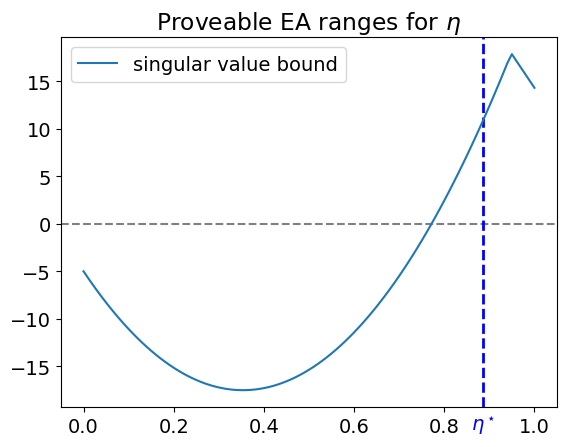

In [241]:
n=100
eta_range = np.linspace(0, 1, n+1)
value_gap = []

for i in range(n+1):
    eta = eta_range[i]
    value_ = is_eta_EA(eta, sigma_k_maj, U_EA_size, ASV, n_bar, AV, alpha)
    value_gap.append(value_)
    print(eta, value_)
    
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(x=eta_star, color='blue', linestyle='--', linewidth=2)
plt.plot(eta_range,value_gap, label = 'singular value bound')
plt.title('Proveable EA ranges for $\eta$')
plt.text(eta_star, -20, r'$\eta^\star$', ha='center', va='top', color='blue', fontsize=14)
plt.legend()
plt.savefig('Desktop/proveable_EA_ranges.png')

In [238]:
eta_star = find_effective_eta(sigma_k_maj, alpha, n_bar, ASV, AV, kappa, U_EA_size)
eta_star


0.8859417019301559

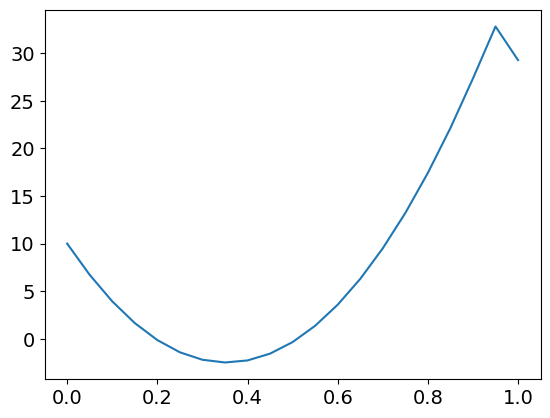

In [223]:
plt.plot(eta_range,value_gap)

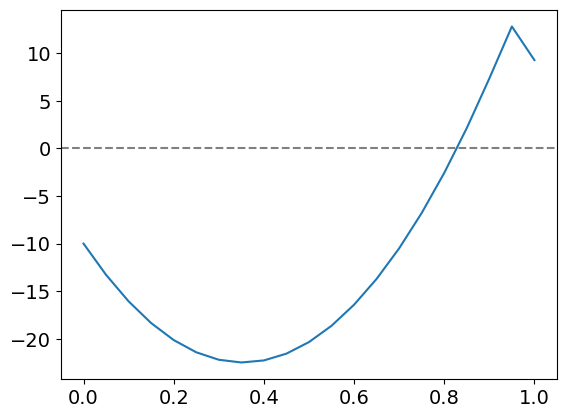

In [226]:
n=20
eta_range = np.linspace(0, 1, n+1)
value_gap = []

for i in range(n+1):
    eta = eta_range[i]
    value_ = is_eta_EA(eta, sigma_k_maj, U_EA_size, ASV, n_bar, AV, alpha)
    value_gap.append(value_)
    
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
plt.plot(eta_range,value_gap)
#plt.plot(eta_range,value_gap)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.6730113452586604
0.6501143554534625
0.6304614063205747
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665
0
0
0
0.9748470692656699
0.9254799739750221
0.8859417019301559
0.8535533905932737
0.8265290224772521
0.8036320326720543
0.7839790835391665


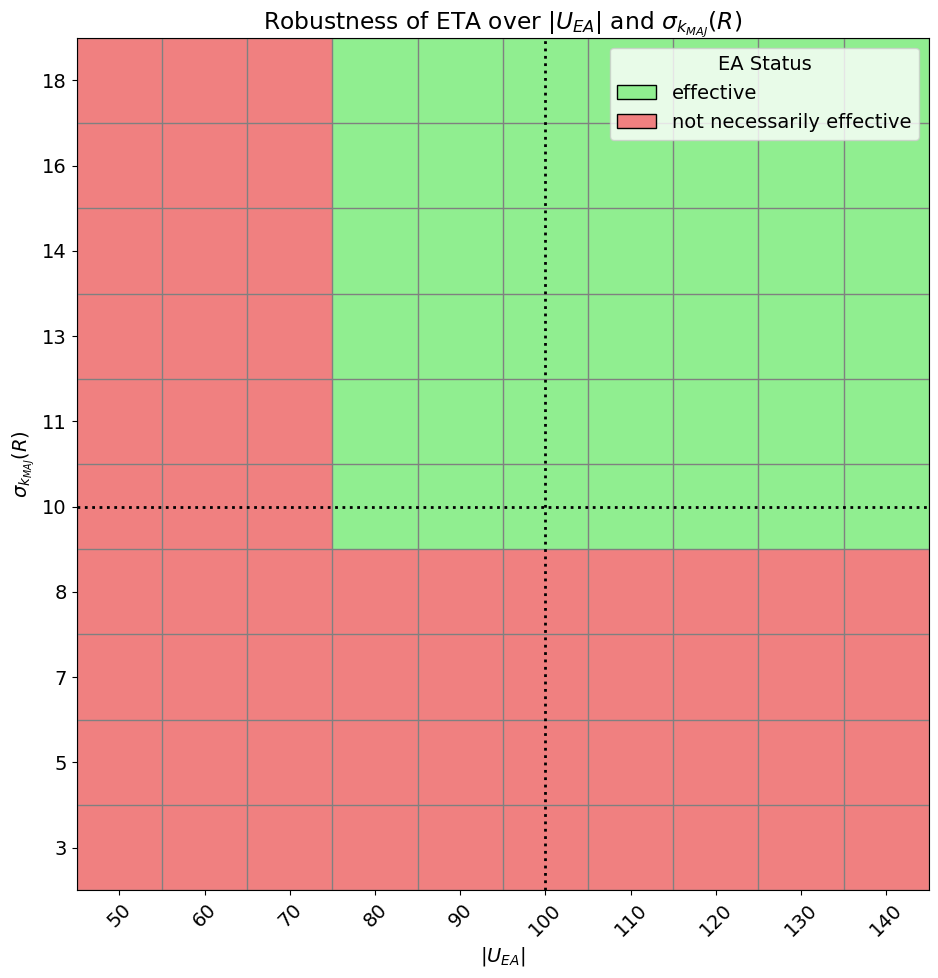

In [245]:
plt.rcParams.update({'font.size': 14})
from matplotlib.patches import Patch

sigma_k_maj = np.sqrt(m_maj)  # Example central value

# Create 10 values for U_EA and sigma_k_maj ranges
U_EA_range = np.linspace(int(m_maj / 2), int(3 * m_maj / 2-10), 10, dtype=int)
sigma_range = np.linspace(alpha, int(sigma_k_maj + 8), 10, dtype=int)

n_sigma = len(sigma_range)
n_U_EA = len(U_EA_range)

# Matrix to store binary results
M = np.zeros((n_sigma, n_U_EA))

# Fill matrix
for i in range(n_sigma):
    for j in range(n_U_EA):
        sigma_ = sigma_range[i]
        U_EA_ = U_EA_range[j]
        
        eta_ = find_effective_eta(sigma_, alpha, n_bar, ASV, AV, kappa, U_EA_)
        
        if eta_ > 0:
            M[i, j] = is_eta_EA(eta_, sigma_k_maj, U_EA_size, ASV, n_bar, AV, alpha)
        else:
            M[i, j] = 0
        print(eta_)

# Colormap setup
cmap = mcolors.ListedColormap(['lightcoral', 'lightgreen'])
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(M, cmap=cmap, norm=norm, interpolation='none', origin='lower', aspect='equal')

# Set axis labels and titles
ax.set_xlabel('$|U_{EA}|$')
ax.set_ylabel('$\sigma_{k_{MAJ}}(R)$')
ax.set_title('Robustness of ETA over $|U_{EA}|$ and $\sigma_{k_{MAJ}}(R)$')

# Set tick positions and labels to actual values
ax.set_xticks(np.arange(n_U_EA))
ax.set_xticklabels(U_EA_range, rotation=45)
ax.set_yticks(np.arange(n_sigma))
ax.set_yticklabels(sigma_range)

# Add grid lines
ax.set_xticks(np.arange(n_U_EA+1)-0.5, minor=True)
ax.set_yticks(np.arange(n_sigma+1)-0.5, minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

# Find indices of true values (if they exist in the range)
try:
    sigma_idx = np.where(sigma_range == 10)[0][0]
    ax.axhline(y=sigma_idx, color='black', linestyle=':', linewidth=2, label='True σ_k')
except IndexError:
    pass  # 10 not in sigma_range

try:
    U_EA_idx = np.where(U_EA_range == 100)[0][0]
    ax.axvline(x=U_EA_idx, color='black', linestyle=':', linewidth=2, label='True |U_EA|')
except IndexError:
    pass  # 100 not in U_EA_range
# Optional colorbar
# plt.colorbar(img, ax=ax, ticks=[0, 1], label='EA Validity')
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='effective'),
    Patch(facecolor='lightcoral', edgecolor='black', label='not necessarily effective')
]

# Add the legend to your plot
ax.legend(handles=legend_elements, loc='upper right', title='EA Status')


plt.tight_layout()
plt.savefig('Desktop/robustness_paramaters.png')
plt.show()